
Importing tensorflow



In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

Loading dataset

In [0]:
mnist = tf.keras.datasets.mnist # 28x28 sized images

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [0]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

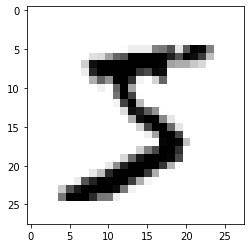

5


In [0]:
plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()
print(y_train[0])

Normalize the data

In [0]:
x_train = tf.keras.utils.normalize(x_train, axis=1)     #training data
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [0]:
x_test = tf.keras.utils.normalize(x_test, axis=1)       #test data normalization

#Building the neural network
One input layer, 2 hidden layers and one output layer. Deep NN

Here, I will stick with a feed forward model (Sequential)

In [0]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten())        #our input layer is flat

model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))    #relu is the go to activation function
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

In [0]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])     #goto optimizer adam

In [0]:
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2577 - accuracy: 0.9238
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1075 - accuracy: 0.9671
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0722 - accuracy: 0.9774


In [0]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print('Value loss:',val_loss)
print('Accuracy:',val_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.0853 - accuracy: 0.9726
Value loss: 0.0852973610162735
Accuracy: 0.972599983215332


Predicting now

In [0]:
preds = model.predict(x_test)

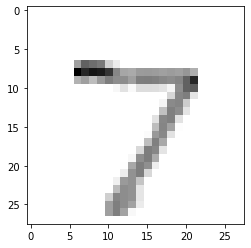

Predicted number: 7
Actual number: 7


In [0]:
plt.imshow(x_test[0], cmap=plt.cm.binary)
plt.show()
print('Predicted number:',np.argmax(preds[0]))
print('Actual number:',y_test[0])

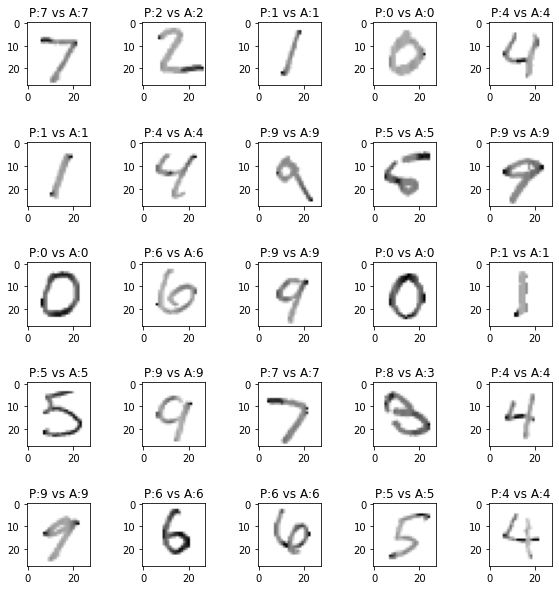

In [0]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.subplots_adjust(hspace=0.9)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    title = 'P:' + str(np.argmax(preds[i])) + ' vs A:' + str(y_test[i])
    plt.title(title)
    

The 19th image is missclassified :P